#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [51]:
flights_df = pd.read_csv('./data_bootcamp/flights_df_clean.csv')

In [52]:
flights_df.head()

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-03-07 00:00:00,DL,DL,1251,DL,N344DN,1251,10397,ATL,"Atlanta, GA",...,109.0,116.0,79.0,1.0,594.0,0.0,0.0,0.0,0.0,0.0
1,2019-03-07 00:00:00,DL,DL,1252,DL,N314NB,1252,13198,MCI,"Kansas City, MO",...,225.0,233.0,218.0,1.0,1363.0,15.0,0.0,8.0,0.0,0.0
2,2019-03-07 00:00:00,DL,DL,1253,DL,N332NB,1253,14492,RDU,"Raleigh/Durham, NC",...,377.0,379.0,344.0,1.0,2354.0,0.0,0.0,0.0,0.0,0.0
3,2019-03-07 00:00:00,DL,DL,1254,DL,N535US,1254,10397,ATL,"Atlanta, GA",...,335.0,337.0,311.0,1.0,2182.0,0.0,0.0,0.0,0.0,0.0
4,2019-03-07 00:00:00,DL,DL,1255,DL,N393DA,1255,14570,RNO,"Reno, NV",...,89.0,76.0,61.0,1.0,422.0,0.0,0.0,0.0,0.0,0.0


* Look for outliers; z-score, IQR detect and remove outliers
* Reminder: normal distribution = bell curve, mean = median

In [53]:
#take all the 'delay' columns from table
flight_delay = flights_df.loc[:,['dep_delay', 
               'arr_delay', 
               'carrier_delay', 
               'weather_delay', 
               'nas_delay', 
               'security_delay', 
               'late_aircraft_delay']]

In [54]:
flight_delay.head(10)
#dep_delay and arr_delay seem to be calculated based on other delay columns
#Not all values accounted for, but close enough.

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1.0,8.0,0.0,0.0,0.0,0.0,0.0
1,15.0,23.0,15.0,0.0,8.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-6.0,-19.0,0.0,0.0,0.0,0.0,0.0
5,8.0,-11.0,0.0,0.0,0.0,0.0,0.0
6,4.0,9.0,0.0,0.0,0.0,0.0,0.0
7,54.0,31.0,5.0,0.0,0.0,0.0,26.0
8,-7.0,-19.0,0.0,0.0,0.0,0.0,0.0
9,10.0,5.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#remove rows with all 0.0 values
flight_delay.loc[~(flight_delay==0).all(axis=1)]
flight_delay.head()

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1.0,8.0,0.0,0.0,0.0,0.0,0.0
1,15.0,23.0,15.0,0.0,8.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-6.0,-19.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Take values of dep_delay and arr_delay
dep_delay_val = flight_delay.loc[:,['dep_delay']]
arr_delay_val = flight_delay.loc[:,['arr_delay']]

In [57]:
#dep_delay IQR
Q1_d = dep_delay_val.quantile(0.25)
Q3_d = dep_delay_val.quantile(0.75)
IQR_d = Q3_d - Q1_d

In [58]:
#Filtering Values between Q1-1.5IQR and Q3+1.5IQR
dep_delay_filtered = dep_delay_val[~((dep_delay_val < (Q1_d - 1.5 * IQR_d)) |
                                     (dep_delay_val > (Q3_d + 1.5 * IQR_d))).any(axis=1)]

In [59]:
#mean and median
print('Mean:',dep_delay_filtered.mean())
print('Median:',dep_delay_filtered.median())

Mean: dep_delay   -1.356811
dtype: float64
Median: dep_delay   -3.0
dtype: float64


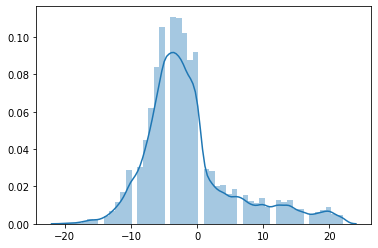

In [60]:
#plot histogram
sns.distplot(dep_delay_filtered)

In [64]:
#Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(dep_delay_filtered)
shapiro_test

(0.9007049202919006, 0.0)

In [65]:
#arr_delay IQR
Q1_a = arr_delay_val.quantile(0.25)
Q3_a = arr_delay_val.quantile(0.75)
IQR_a = Q3_a - Q1_a

In [66]:
#Filtering Values between Q1-1.5IQR and Q3+1.5IQR
arr_delay_filtered = arr_delay_val[~((arr_delay_val < (Q1_a - 1.5 * IQR_a)) |
                                     (arr_delay_val > (Q3_a + 1.5 * IQR_a))).any(axis=1)]

In [68]:
#mean and median
print('Mean:',arr_delay_filtered.mean())
print('Median:',arr_delay_filtered.median())

Mean: arr_delay   -4.825531
dtype: float64
Median: arr_delay   -7.0
dtype: float64


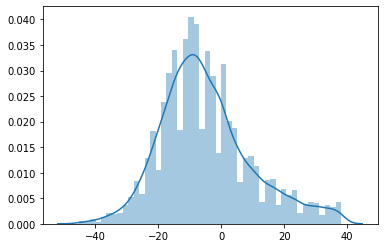

In [69]:
sns.distplot(arr_delay_filtered)

In [70]:
#Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(arr_delay_filtered)
shapiro_test

/home/jewelle/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9697942733764648, 1.1295504152775906e-36)